In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [150]:
df = pd.read_csv("nba_salaries.csv")
df

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,grayra01


### Dropping unnecessary columns

In [151]:
df.drop(["Unnamed: 0", "Player-additional"], axis=1, inplace=True)

In [152]:
salary_col = df.pop("Salary")   
df.insert(29, "Salary", salary_col)
df

,Player Name,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,48070014
1,John Wall,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,47345760
2,Russell Westbrook,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,47080179
3,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,44474988
4,Kevin Durant,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,44119845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,SF,23,POR,4,0,22.3,1.8,5.8,0.304,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,35096
463,Kobi Simmons,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,32795
464,Gabe York,SG,29,IND,3,0,18.7,2.7,7.0,0.381,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,32171
465,RaiQuan Gray,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,5849


In [153]:
df.shape

(467, 30)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  467 non-null    object 
 1   Position     467 non-null    object 
 2   Age          467 non-null    int64  
 3   Team         467 non-null    object 
 4   GP           467 non-null    int64  
 5   GS           467 non-null    int64  
 6   MP           467 non-null    float64
 7   FG           467 non-null    float64
 8   FGA          467 non-null    float64
 9   FG%          466 non-null    float64
 10  3P           467 non-null    float64
 11  3PA          467 non-null    float64
 12  3P%          454 non-null    float64
 13  2P           467 non-null    float64
 14  2PA          467 non-null    float64
 15  2P%          463 non-null    float64
 16  eFG%         466 non-null    float64
 17  FT           467 non-null    float64
 18  FTA          467 non-null    float64
 19  FT%     

In [155]:
#df_copy.iloc[0, 5:31].gt(0)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  467 non-null    object 
 1   Position     467 non-null    object 
 2   Age          467 non-null    int64  
 3   Team         467 non-null    object 
 4   GP           467 non-null    int64  
 5   GS           467 non-null    int64  
 6   MP           467 non-null    float64
 7   FG           467 non-null    float64
 8   FGA          467 non-null    float64
 9   FG%          466 non-null    float64
 10  3P           467 non-null    float64
 11  3PA          467 non-null    float64
 12  3P%          454 non-null    float64
 13  2P           467 non-null    float64
 14  2PA          467 non-null    float64
 15  2P%          463 non-null    float64
 16  eFG%         466 non-null    float64
 17  FT           467 non-null    float64
 18  FTA          467 non-null    float64
 19  FT%     

In [157]:
df.isnull().sum()

Player Name     0
Position        0
Age             0
Team            0
GP              0
GS              0
MP              0
FG              0
FGA             0
FG%             1
3P              0
3PA             0
3P%            13
2P              0
2PA             0
2P%             4
eFG%            1
FT              0
FTA             0
FT%            23
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Salary          0
dtype: int64

### Filling Null Values

In [158]:
df[df["FG%"].isna()]
print("FG:", df[df["FG%"].isna()]["FG"])
print("FGA:", df[df["FG%"].isna()]["FGA"])

##Since FG and FGA are both 0, we can fill the null value of this particular column to 0
df["FG%"].fillna(0, inplace=True)

FG: 436    0.0
Name: FG, dtype: float64
FGA: 436    0.0
Name: FGA, dtype: float64


In [159]:
df[df["3P%"].isna()]
print("3P:", df[df["3P%"].isna()]["3P"])
print("3PA:", df[df["3P%"].isna()]["3PA"])

#Since the value of 3P and 3PA are zero for all of them, we'll fill the NaN values for the column 3p% to 0.
df["3P%"].fillna(0, inplace=True)

3P: 75     0.0
133    0.0
233    0.0
264    0.0
301    0.0
332    0.0
395    0.0
404    0.0
421    0.0
428    0.0
436    0.0
439    0.0
441    0.0
Name: 3P, dtype: float64
3PA: 75     0.0
133    0.0
233    0.0
264    0.0
301    0.0
332    0.0
395    0.0
404    0.0
421    0.0
428    0.0
436    0.0
439    0.0
441    0.0
Name: 3PA, dtype: float64


In [160]:
df[df["2P%"].isna()]
print("2P:", df[df["2P%"].isna()]["2P"])
print("2PA:", df[df["2P%"].isna()]["2PA"])

#Since the value of 2P and 2PA are zero for all of them, we'll fill the NaN values for the column 3p% to 0.
df["2P%"].fillna(0, inplace=True)

2P: 403    0.0
436    0.0
459    0.0
466    0.0
Name: 2P, dtype: float64
2PA: 403    0.0
436    0.0
459    0.0
466    0.0
Name: 2PA, dtype: float64


In [161]:
df[df["eFG%"].isna()]
print("FG:", df[df["eFG%"].isna()]["FG"])
print("FGA:", df[df["eFG%"].isna()]["FGA"])

df["eFG%"].fillna(0, inplace=True)


FG: 436    0.0
Name: FG, dtype: float64
FGA: 436    0.0
Name: FGA, dtype: float64


In [162]:
df[df["FT%"].isna()]
print("FT:", df[df["FT%"].isna()]["FT"])
print("FTA:", df[df["FT%"].isna()]["FTA"])

##Since FT and FTA are both 0, we can fill the null value of this particular column to 0
df["FT%"].fillna(0, inplace=True)

FT: 221    0.0
247    0.0
254    0.0
344    0.0
356    0.0
358    0.0
393    0.0
397    0.0
403    0.0
404    0.0
408    0.0
416    0.0
425    0.0
436    0.0
437    0.0
439    0.0
440    0.0
444    0.0
449    0.0
453    0.0
454    0.0
458    0.0
466    0.0
Name: FT, dtype: float64
FTA: 221    0.0
247    0.0
254    0.0
344    0.0
356    0.0
358    0.0
393    0.0
397    0.0
403    0.0
404    0.0
408    0.0
416    0.0
425    0.0
436    0.0
437    0.0
439    0.0
440    0.0
444    0.0
449    0.0
453    0.0
454    0.0
458    0.0
466    0.0
Name: FTA, dtype: float64


In [163]:
df.isnull().sum()

Player Name    0
Position       0
Age            0
Team           0
GP             0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
Salary         0
dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  467 non-null    object 
 1   Position     467 non-null    object 
 2   Age          467 non-null    int64  
 3   Team         467 non-null    object 
 4   GP           467 non-null    int64  
 5   GS           467 non-null    int64  
 6   MP           467 non-null    float64
 7   FG           467 non-null    float64
 8   FGA          467 non-null    float64
 9   FG%          467 non-null    float64
 10  3P           467 non-null    float64
 11  3PA          467 non-null    float64
 12  3P%          467 non-null    float64
 13  2P           467 non-null    float64
 14  2PA          467 non-null    float64
 15  2P%          467 non-null    float64
 16  eFG%         467 non-null    float64
 17  FT           467 non-null    float64
 18  FTA          467 non-null    float64
 19  FT%     

In [165]:
df.describe()

,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02
mean,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.464013,0.996574,2.792719,0.316041,...,0.866809,2.662099,3.528051,2.107709,0.610493,0.379015,1.114133,1.702784,9.129979,8.416599e+06
std,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.111525,0.880468,2.260794,0.140385,...,0.746976,1.707984,2.277160,1.957517,0.399083,0.364387,0.830051,0.776957,6.906006,1.070812e+07
min,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.849000e+03
25%,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,1.000000,0.281000,...,0.400000,1.400000,1.900000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000,1.782621e+06
50%,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,2.400000,0.339000,...,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.700000,7.100000,3.722040e+06
75%,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507000,1.500000,4.150000,0.385500,...,1.100000,3.500000,4.500000,2.900000,0.800000,0.500000,1.500000,2.200000,11.700000,1.063354e+07
max,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,...,5.100000,9.600000,12.500000,10.700000,3.000000,2.500000,4.100000,5.000000,33.100000,4.807001e+07


### Data Visualization

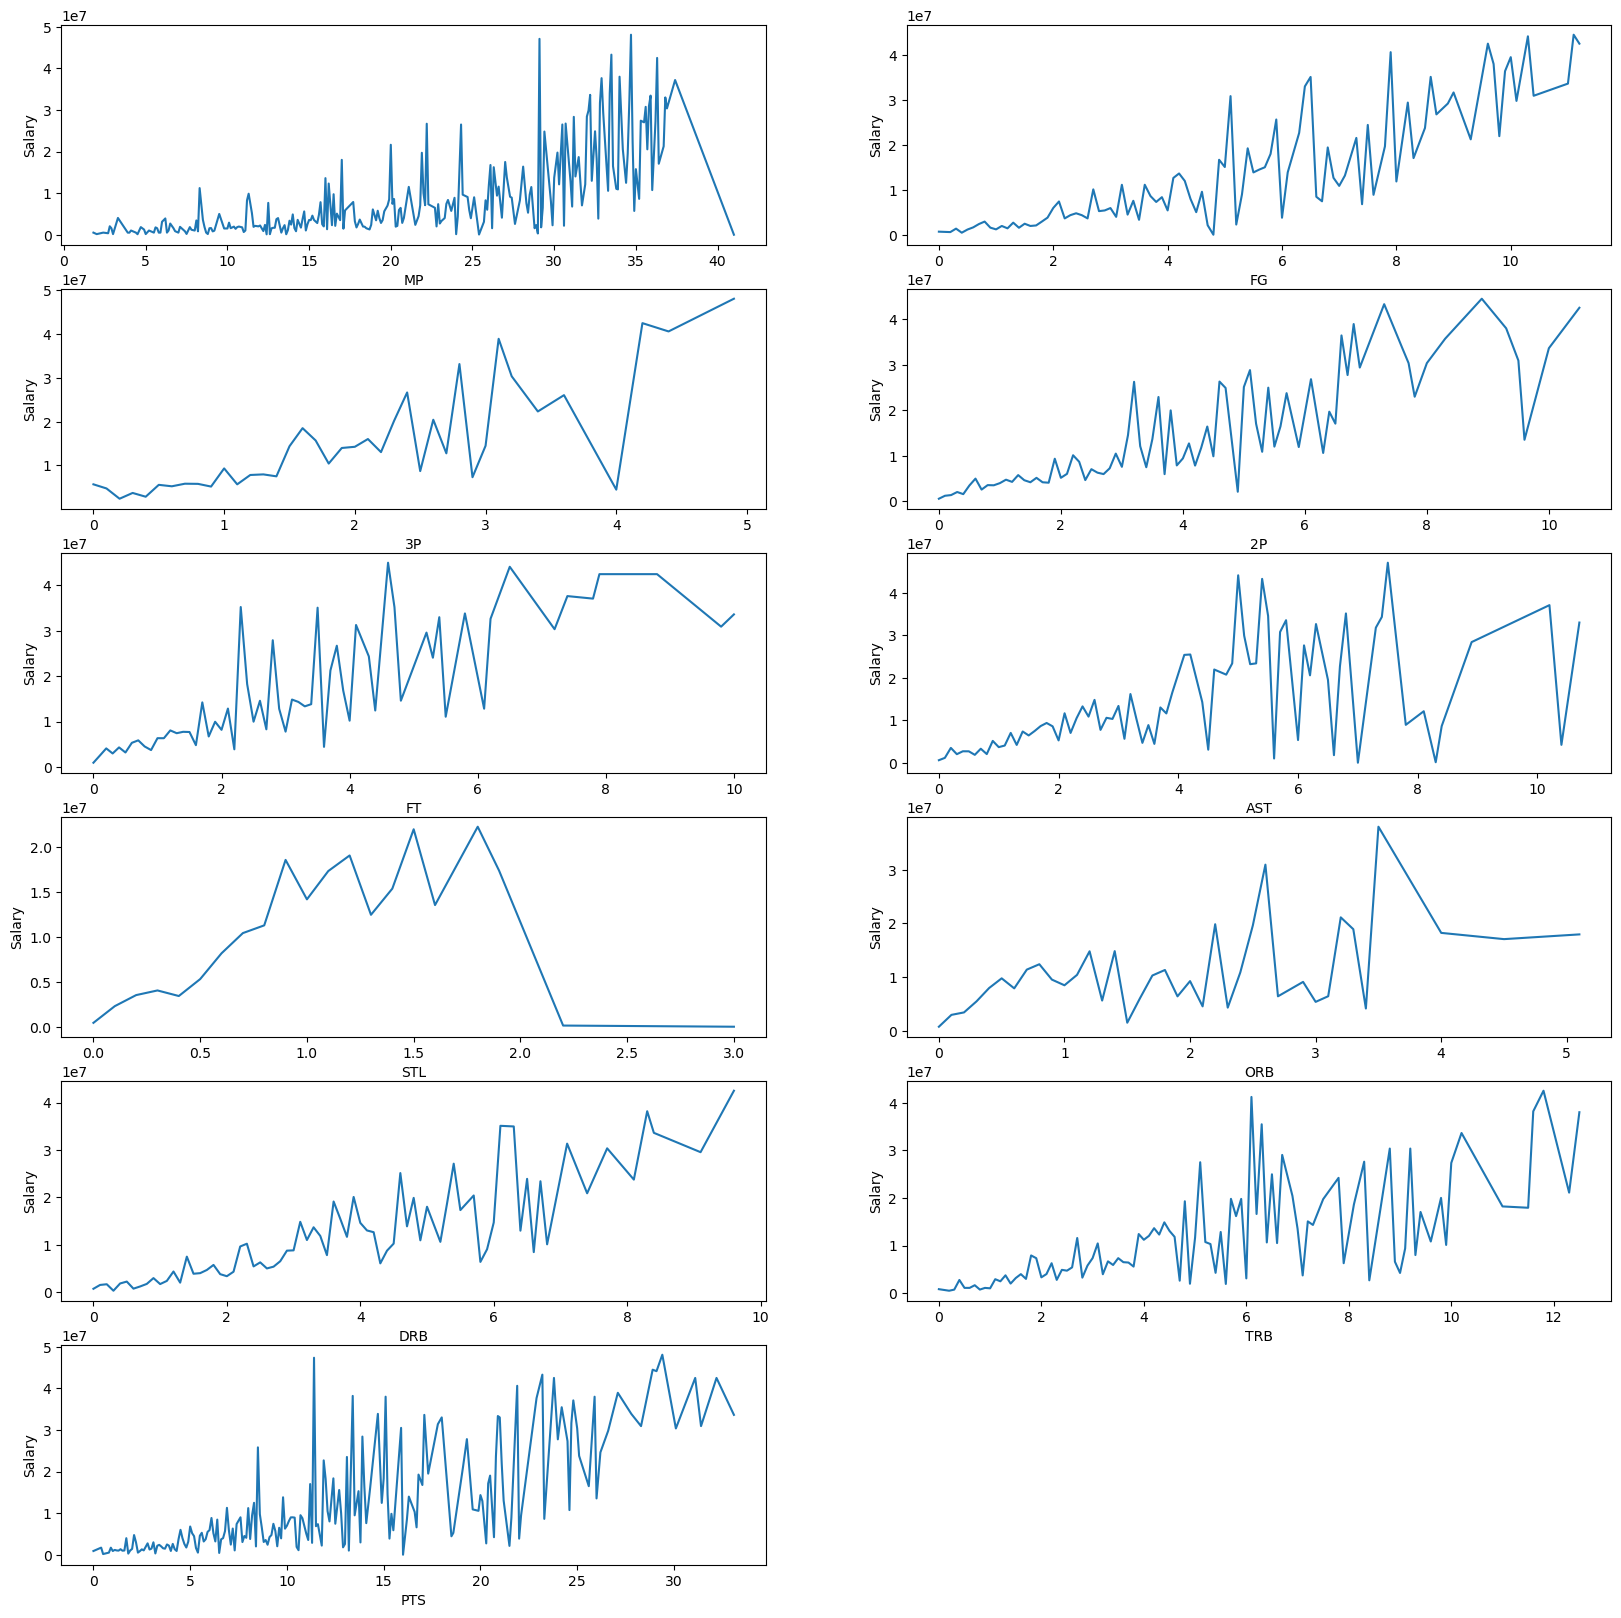

In [166]:
x_label = ["MP","FG", "3P", "2P", "FT", "AST", "STL", "ORB", "DRB", "TRB", "PTS"]
plt.figure(figsize=(20,20))
j = 1
for i in x_label:
    plt.subplot(6,2,j)
    sns.lineplot(x = i, y = "Salary", data = df,errorbar=None)
    j +=1
plt.show()


In [167]:
#Sorting by column "salary" in descending order
df.sort_values(by=['Salary'], ascending = False)

,Player Name,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,48070014
1,John Wall,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,47345760
2,Russell Westbrook,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,47080179
3,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,44474988
4,Kevin Durant,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,44119845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,SF,23,POR,4,0,22.3,1.8,5.8,0.304,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,35096
463,Kobi Simmons,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,32795
464,Gabe York,SG,29,IND,3,0,18.7,2.7,7.0,0.381,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,32171
465,RaiQuan Gray,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,5849


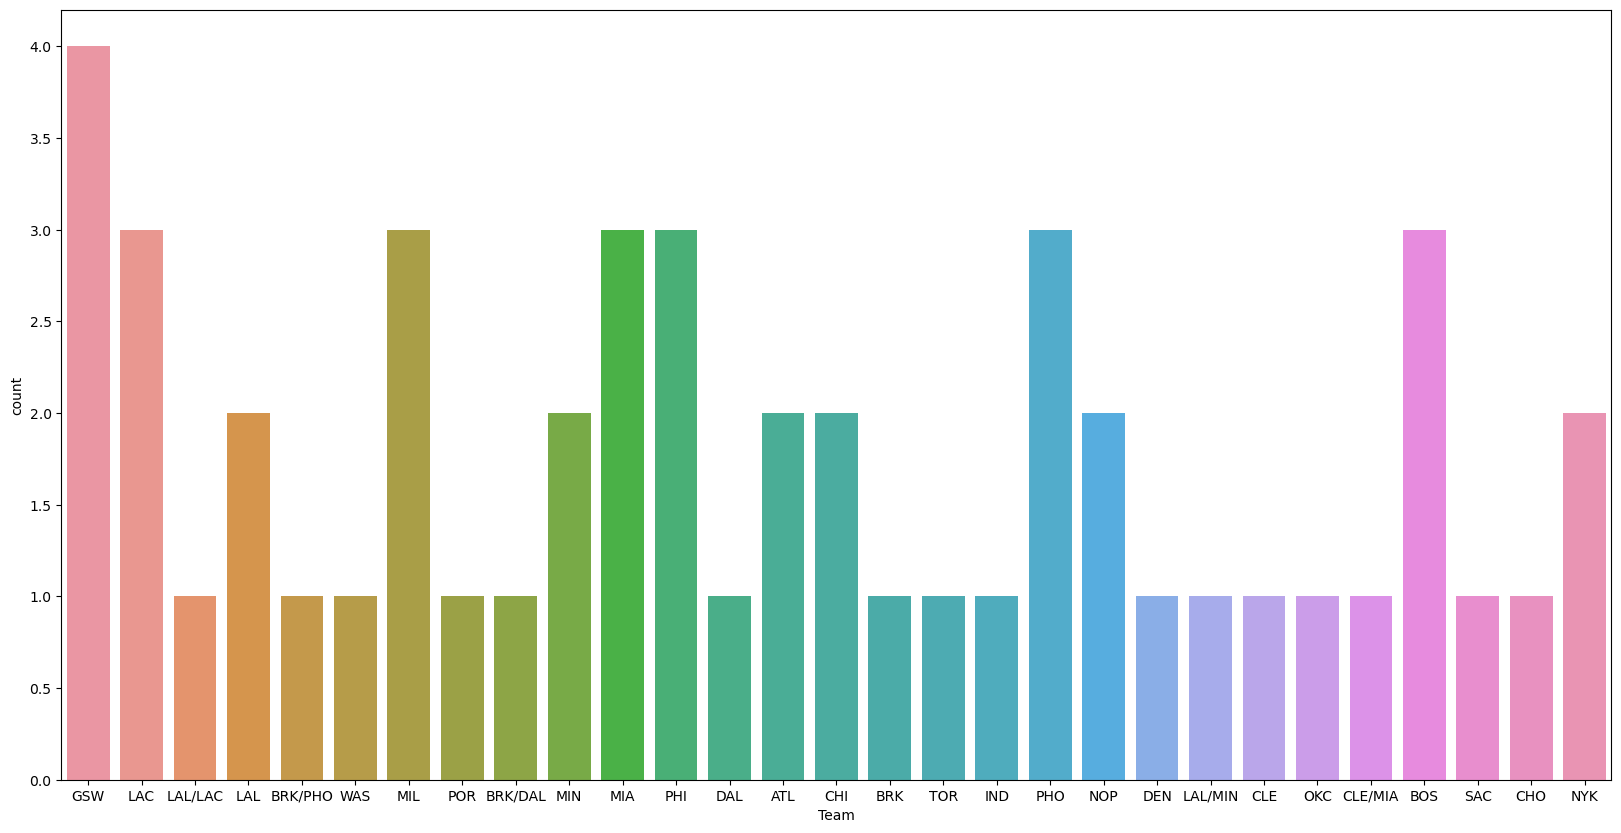

In [168]:
df_extract = df.head(50)
plt.figure(figsize=(20,10))
sns.countplot(x = "Team", data=df_extract)
plt.show()

In [169]:
fig = px.pie(names=df_extract["Position"])
fig.show()

In [170]:
plt.figure(figsize=(20,20))
df.columns

Index(['Player Name', 'Position', 'Age', 'Team', 'GP', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Salary'],
      dtype='object')

<Figure size 2000x2000 with 0 Axes>

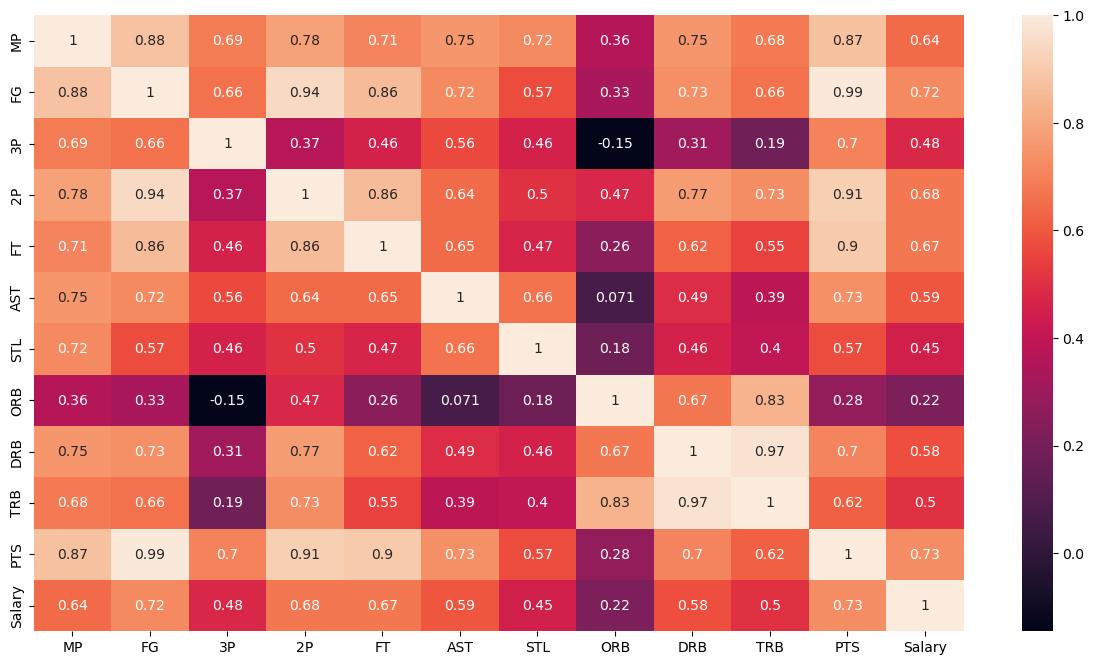

In [171]:
plt.figure(figsize=(15,8))
sns.heatmap(df[["MP","FG", "3P", "2P", "FT", "AST", "STL", "ORB", "DRB", "TRB", "PTS", "Salary"]].corr(), annot = True)
#sns.heatmap(df[["GP", "MP","FG", "3P", "2P", "FT", "AST", "STL", "ORB", "DRB", "TRB", "PTS"]].corr(), annot = True)
plt.show()

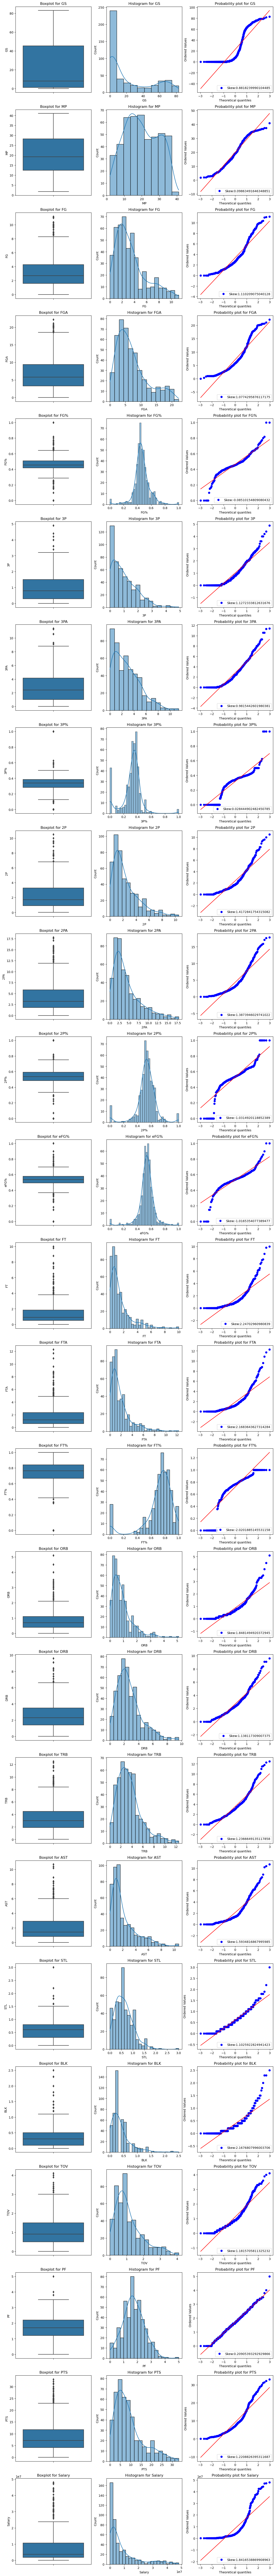

In [172]:
fig,axes = plt.subplots(len(df.columns[5:31]),3,figsize=(15,150))
j = 0
for i in df.columns[5:31]:
    sns.boxplot(y=i, data = df, ax=axes[j,0])
    axes[j,0].set_title(f"Boxplot for {i}")
    sns.histplot(x= i, kde=True, data = df, ax=axes[j,1])
    axes[j,1].set_title(f"Histogram for {i}")
    sp.stats.probplot(df[i], plot=axes[j,2])
    axes[j,2].set_title(f"Probability plot for {i}")
    axes[j,2].legend(labels = [f'Skew:{df[i].skew()}'], loc = "lower right")
    j+=1
plt.show()

### Testing Hypothesis

* After standardizing the data, we're trying to predict the mean salary of the NBA players
* A testing hypothesis will be employed to check whether it is actually true or not.

* $H_0$ : $\mu$ =8000000    v/s $H_1$ : $\mu$ $\not=$ 8000000

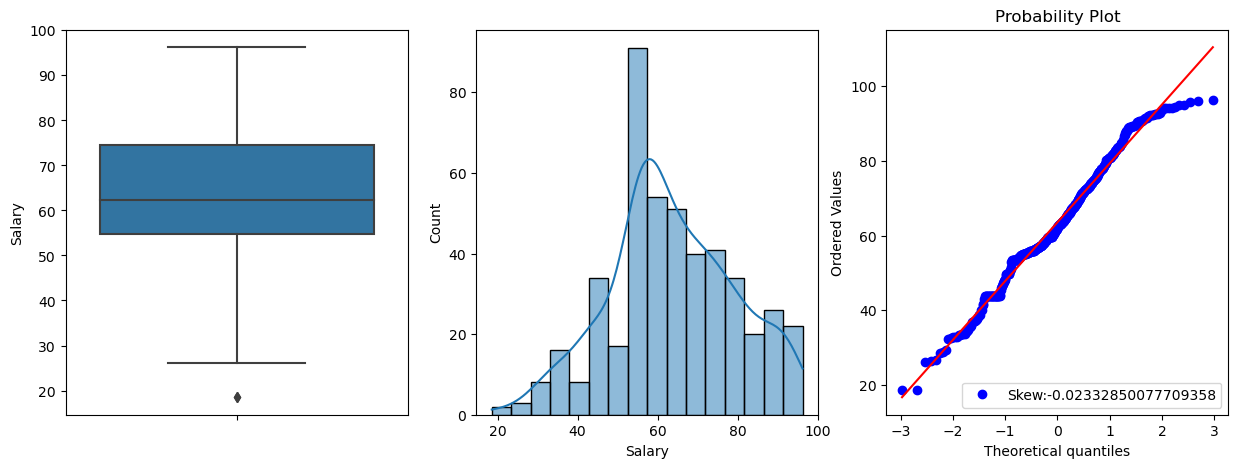

In [173]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
col_normalized, lamb = sp.stats.boxcox(df["Salary"])
col_boxcox = ((((df["Salary"])**lamb) - 1) / lamb)
sns.boxplot(y=col_boxcox, data = df, ax=axes[0])
sns.histplot(x= col_boxcox, kde=True, data = df, ax=axes[1])
sp.stats.probplot(col_boxcox, plot=axes[2])
axes[2].legend(labels = [f'Skew:{col_boxcox.skew()}'], loc = "lower right")
plt.show()

In [174]:
#loading normalized data
salary_sample  = col_boxcox

alpha = 0.05    #setting the level of significance
mu = 8000000    #setting the null hypothesis

normalized_mu = (((mu**lamb) - 1) / lamb)   #normalizing the value of mu

z_calc = (salary_sample.mean() - normalized_mu)/(np.var(salary_sample)/((len(salary_sample))**0.5))    #calculating z-calc
print(z_calc)

-0.64636677669443


In [175]:
p = 2 * (1 - sp.stats.norm.cdf(abs(z_calc)))    # calculating the p-value
print("p-value = ", p)

if p <alpha:
    print("Reject H0: The average salary of the NBA players is not equal to 8,000,000")
else:
    print("Do not Reject H0: The average salary of the NBA players is equal to 8,000,000")

p-value =  0.5180418511987759
Do not Reject H0: The average salary of the NBA players is equal to 8,000,000
